In [63]:
import zipfile
import os
with zipfile.ZipFile('extracted_files.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_recipes_df = pd.read_csv('extracted_files/RAW_recipes.csv')
raw_interactions_df = pd.read_csv('extracted_files/RAW_interactions.csv')

In [5]:
print('Shape of Raw Recipes Data :', raw_recipes_df.shape)
print('Shape of Raw Interactions Data :', raw_interactions_df.shape)

Shape of Raw Recipes Data : (231637, 12)
Shape of Raw Interactions Data : (1132367, 5)


In [6]:
raw_recipes_df.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [7]:
raw_interactions_df.head(10)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


In [8]:
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [9]:
raw_recipes_df['id'] = raw_recipes_df['id'].astype(str)
raw_recipes_df['contributor_id'] = raw_recipes_df['contributor_id'].astype(str)
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  object
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  object
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 21.2+ MB


In [10]:
#Để thuận tiện cho việc thao tác dữ liệu, ta sẽ chuyển đổi 'id' và 'contributor_id' về dạng string thay vì để interger, và 'submitted' từ dạng object về dạng datetime
raw_recipes_df['submitted'] = pd.to_datetime(raw_recipes_df['submitted'], format = '%Y-%m-%d')
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  object        
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  object        
 4   submitted       231637 non-null  datetime64[ns]
 5   tags            231637 non-null  object        
 6   nutrition       231637 non-null  object        
 7   n_steps         231637 non-null  int64         
 8   steps           231637 non-null  object        
 9   description     226658 non-null  object        
 10  ingredients     231637 non-null  object        
 11  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 21.2+ MB


In [11]:
raw_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [12]:
#Tương tự điều chỉnh 'user_id' và 'recipe_id' về dạng string, 'date' về dạng datetime trong tập dữ liệu raw_interactions
raw_interactions_df['user_id'] = raw_interactions_df['user_id'].astype(str)
raw_interactions_df['recipe_id'] = raw_interactions_df['recipe_id'].astype(str)
raw_interactions_df['date'] = pd.to_datetime(raw_interactions_df['date'], format = '%Y-%m-%d')
raw_interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  object        
 1   recipe_id  1132367 non-null  object        
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.2+ MB


In [13]:
#Bây giờ, Kiểm tra xem tập dữ liệu có missing value hay không
raw_recipes_df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [14]:
raw_interactions_df.isnull().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [15]:
raw_recipes_df[raw_recipes_df['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


In [16]:
raw_recipes_df.dropna(subset = ['name'], inplace = True)

In [17]:
raw_recipes_df= raw_recipes_df.drop(columns = ['description'])

In [18]:
raw_recipes_df.sample(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
70142,debbie s delightful spinach salad,108293,10,96896,2005-01-14,"['15-minutes-or-less', 'time-to-make', 'course...","[737.0, 92.0, 153.0, 40.0, 13.0, 37.0, 16.0]",4,"['blend dressing ingredients all together', 'p...","['spinach', 'toasted almonds', 'purple cabbage...",11
42551,chicken and bean dinner,44676,500,37779,2002-10-29,"['weeknight', 'time-to-make', 'course', 'main-...","[718.9, 23.0, 77.0, 87.0, 82.0, 25.0, 37.0]",5,"['in a skillet , saute chicken , bacon , and o...","['ground chicken', 'bacon', 'onion', 'pork and...",11
125659,louisiana chicken and sausage gumbo the real s...,47656,120,15851,2002-11-24,"['weeknight', 'time-to-make', 'course', 'main-...","[3080.8, 327.0, 49.0, 41.0, 472.0, 303.0, 14.0]",17,['melt some butter in your heavy bottomed pot'...,"['whole chicken', 'sausage', 'water', 'butter'...",12
95551,grandpa s apple crisp crumble,27933,50,39547,2002-05-09,"['60-minutes-or-less', 'time-to-make', 'course...","[621.9, 37.0, 289.0, 9.0, 8.0, 74.0, 33.0]",8,"['put apples in buttered 9x10 baking dish', 's...","['apples', 'water', 'brown sugar', 'quick oats...",7
214861,tomato cream sauce with rigatoni,485726,120,2360933,2012-08-21,"['time-to-make', 'course', 'main-ingredient', ...","[276.3, 22.0, 21.0, 27.0, 14.0, 36.0, 8.0]",18,['in large pot cook bacon and onion until baco...,"['bacon', 'onions', 'white wine', 'extra virgi...",15
8711,artichoke garlic linguine,95295,35,145448,2004-07-08,"['60-minutes-or-less', 'time-to-make', 'main-i...","[160.4, 1.0, 9.0, 2.0, 13.0, 0.0, 11.0]",11,['cook linguine according to the package direc...,"['linguine', 'marinated artichoke hearts', 'ga...",7
53455,cinnabon ish cinnamon rolls gluten free,376575,95,1015482,2009-06-09,"['time-to-make', 'course', 'main-ingredient', ...","[616.4, 49.0, 222.0, 23.0, 8.0, 80.0, 26.0]",29,['dissolve the yeast in large mixing bowl with...,"['butter', 'white sugar', 'skim milk', 'yeast'...",18
58205,corn grits cereal,444254,7,1458294,2010-12-15,"['15-minutes-or-less', 'time-to-make', 'course...","[16.2, 0.0, 0.0, 6.0, 0.0, 0.0, 1.0]",5,"['bring water and salt to a boil', 'add corn g...","['yellow corn grits', 'water', 'salt']",3
29089,broccoli alfredo pasta,117021,20,189643,2005-04-13,"['30-minutes-or-less', 'time-to-make', 'course...","[415.6, 26.0, 9.0, 9.0, 27.0, 51.0, 17.0]",9,['cook pasta according to package directions a...,"['pasta', 'broccoli', 'butter', 'flour', 'milk...",7
123357,lets talk turkey burgers with chipotle mayo a1,518190,21,1803070145,2014-08-25,"['30-minutes-or-less', 'time-to-make', 'course...","[935.6, 96.0, 48.0, 69.0, 72.0, 72.0, 20.0]",15,"['burger prep', '1', 'combine the onion , 2 ta...","['onion', 'a.1. original sauce', 'breadcrumbs'...",19


In [19]:
raw_interactions_df.isnull().sum()
raw_interactions_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [20]:
raw_interactions_df = raw_interactions_df.drop(columns = ['review'])
raw_interactions_df.sample(10)

,user_id,recipe_id,date,rating
821234,1187339,21224,2009-06-05,1
30532,305531,15280,2006-07-11,5
947153,906665,474394,2013-03-31,4
103984,474322,170038,2007-05-14,5
592137,125640,32614,2005-12-12,4
325969,495821,227572,2007-11-24,5
325358,351811,211607,2007-03-17,5
592344,117484,32614,2008-05-01,5
687818,48902,30644,2011-06-22,4
1040409,86072,107133,2006-01-03,4


In [21]:
print('Duplicated Data of the Raw Recipes :', raw_recipes_df.duplicated().sum())
print('Duplicated Data of the Raw Interactions :', raw_interactions_df.duplicated().sum())

Duplicated Data of the Raw Recipes : 0
Duplicated Data of the Raw Interactions : 0


In [22]:
#Bây giờ, ta sẽ xử lý outliers (tức là những dữ liệu ngoại lệ nằm cách xa cụm dữ liệu còn lại, cách xa giá trị trung bình của phân phối dữ liệu)
raw_recipes_df.describe()

,minutes,submitted,n_steps,n_ingredients
count,2.316360e+05,231636,231636.000000,231636.000000
mean,9.398587e+03,2006-11-14 01:53:01.122105344,9.765516,9.051149
min,0.000000e+00,1999-08-06 00:00:00,0.000000,1.000000
25%,2.000000e+01,2004-09-16 00:00:00,6.000000,6.000000
50%,4.000000e+01,2007-01-23 00:00:00,9.000000,9.000000
75%,6.500000e+01,2008-10-29 00:00:00,12.000000,11.000000
max,2.147484e+09,2018-12-04 00:00:00,145.000000,43.000000
std,4.461973e+06,NaN,5.995136,3.734803


C:\Users\Admin\AppData\Local\Temp\ipykernel_20452\2875983822.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_recipes_df['minutes'], ax = ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_20452\2875983822.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_recipes_df['n_steps'], ax 

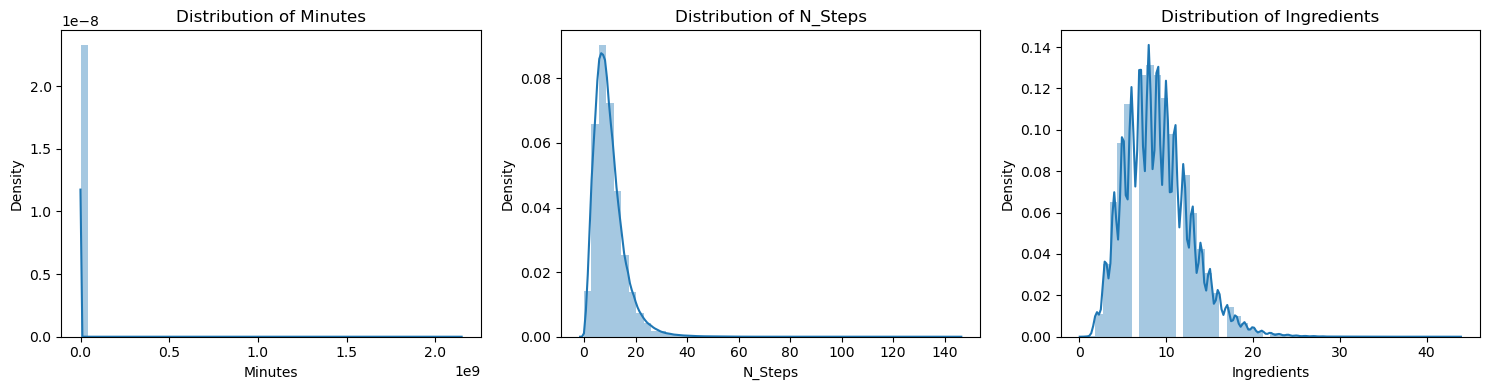

In [23]:
#Ở đây, chúng ta có thể thấy đơn giản rằng với features 'minutes', giá trị lớn nhất là 2,147,484,000 : Quá lớn cho 1 công thức nấu ăn,
#hay như phần n_steps thì 145 bước là số bước quá lớn, quá phức tạp với việc nấu nướng.
#Ta sẽ thực hiện plot các phân phối của các features
fig, ax = plt.subplots(1, 3, figsize = (15, 4))

#Plot phân phối của feature minutes
sns.distplot(raw_recipes_df['minutes'], ax = ax[0])
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Minutes')

#Plot phân phối của feature 'n_steps'
sns.distplot(raw_recipes_df['n_steps'], ax = ax[1])
ax[1].set_xlabel('N_Steps')
ax[1].set_ylabel('Density')
ax[1].set_title('Distribution of N_Steps')

#Plot phân phối của feature 'ingredients'
sns.distplot(raw_recipes_df['n_ingredients'], ax = ax[2])
ax[2].set_xlabel('Ingredients')
ax[2].set_ylabel('Density')
ax[2].set_title('Distribution of Ingredients')

plt.tight_layout()
plt.show()

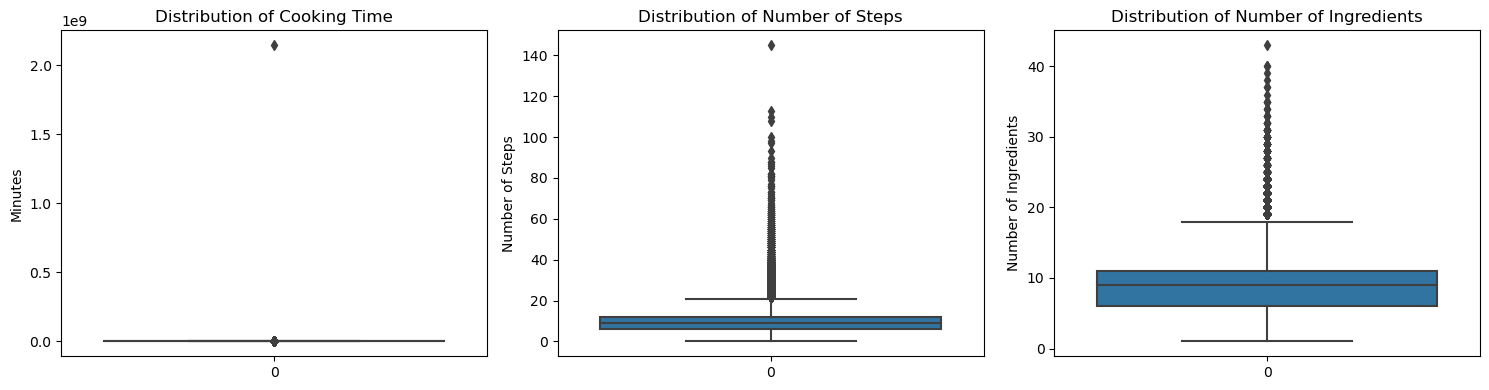

In [24]:
# Boxplots
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'minutes' on the first subplot
sns.boxplot(data=raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_ylabel('Minutes')
ax[0].set_title('Distribution of Cooking Time')

# Plot boxplot of 'n_steps' on the second subplot
sns.boxplot(data=raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_ylabel('Number of Steps')
ax[1].set_title('Distribution of Number of Steps')

# Plot boxplot of 'n_ingredients' on the third subplot
sns.boxplot(data=raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_ylabel('Number of Ingredients')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

#### Ở đây, ta có thể thấy được rõ outliers ở cả 3 feature. Ta sẽ tiến hành phân tích sâu hơn những outliers này bằng phương pháp kiểm định Tukey, một kĩ thuật thống kê được sử dụng để phát hiện và phân tích outliers. Cụ thể, ta sẽ đi tính phân vị và tính toán khoảng IQR để xác định xem những dữ liệu nào nằm ngoài khoảng IQR này ( được coi là outliers).

In [25]:
#Minute
#Calculate IQR
Q1 = raw_recipes_df['minutes'].quantile(0.25)
Q3 = raw_recipes_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

#Tính khoảng giá trị
max_value = Q3 + 1.5 * IQR
min_value = Q3 - 1.5 * IQR

#Lọc ra những dữ liệu nằm ngoài khoảng này
minutes_outliers = raw_recipes_df[(raw_recipes_df['minutes'] > max_value) | (raw_recipes_df['minutes'] < min_value)]
print(minutes_outliers.shape)
minutes_outliers.sort_values('minutes')

(23714, 11)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...","['cream cheese', 'butter', 'egg', 'vanilla', '...",6
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...","['milk', 'vanilla essence', 'butter', 'sugar',...",9
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...","['basmati rice', 'whole milk', 'granulated sug...",7
155657,peanut butter and chocolate chunk cookies,184673,134,261510,2006-09-05,"['time-to-make', 'course', 'preparation', 'for...","[255.8, 23.0, 61.0, 6.0, 12.0, 25.0, 8.0]",12,"['beat peanut butter , butter , and sugars at ...","['creamy peanut butter', 'butter', 'sugar', 'l...",11
99018,grilled halibut with lemon tarragon mustard,116898,134,39547,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[470.1, 23.0, 2.0, 16.0, 153.0, 12.0, 1.0]",8,['in a small bowl whisk together the lemon jui...,"['fresh lemon juice', 'lemon, zest of', 'dijon...",9
...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...","['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","['cream', 'peach']",2


#### Sau khi áp dụng thử phương pháp Tukey thì chúng ta đã có những thống kê về thời gian nấu nướng (phút) được tạm coi là outliers từ lớn đến nhỏ. Tuy nhiên thì nếu như phân tích kĩ, ta có thể thấy ngoại trừ món 'no bake granola balls' và 'how to preserve a husband' ra, những món còn lại với lượng thời gian như vậy đều là hợp lý, ví dụ như 'homemade fruit liquers' cần rất nhiều thời gian ủ , có thể tính bằng tuần. Ta sẽ tiến hành điều chỉnh outlier 'no bake granola balls' sao cho hợp lý, cũng như loại bỏ 'how to preserve a husband'.

In [26]:
# Thay thế bằng 25 phút
raw_recipes_df.loc[raw_recipes_df['id'] == '261647', 'minutes'] = 25

# Check value
raw_recipes_df[raw_recipes_df['id'] == '261647']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
144074,no bake granola balls,261647,25,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...","['rolled oats', 'unsweetened dried shredded co...",8


In [27]:
raw_recipes_df = raw_recipes_df[raw_recipes_df['id'] != '447963']

In [28]:
raw_recipes_df.sort_values('minutes', ascending = True).tail()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...","['fennel seed', 'anise seed', 'coriander seeds...",7
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9,"['use only fully ripened , unblemished fruit',...","['fresh peaches', 'granulated sugar', 'honey',...",4
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...","['berries', 'vodka', 'granulated sugar']",3


#### Ứng dụng Tukey cho feature n_steps

In [29]:
Q1 = raw_recipes_df['n_steps'].quantile(0.25)
Q3 = raw_recipes_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Tính toán khoảng Tukey
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

#LLọc outliers
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_steps'] > max_value) | (raw_recipes_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
116375,kale potato bean chorizo soup canning re...,504473,150,2357608,2013-07-22,"['weeknight', 'time-to-make', 'course', 'main-...","[637.1, 40.0, 26.0, 48.0, 72.0, 46.0, 21.0]",22,['beans: soak your washed and sorted dried bea...,"['dried great northern beans', 'chorizo sausag...",11
170972,raspberry kiwi pavlova,370014,105,56003,2009-05-06,"['time-to-make', 'course', 'main-ingredient', ...","[192.1, 9.0, 114.0, 1.0, 5.0, 17.0, 11.0]",22,['preheat oven to 275f and put rack in middle ...,"['egg whites', 'fine sugar', 'white vinegar', ...",9
170896,raspberry creme fraiche tart,173971,90,314579,2006-06-20,"['time-to-make', 'course', 'main-ingredient', ...","[374.6, 34.0, 94.0, 4.0, 11.0, 66.0, 12.0]",22,"['place baking sheet in bottom of oven', 'pre-...","['unsalted butter', 'sugar', 'salt', 'eggs', '...",9
170873,raspberry cream cheese bread,101479,55,152995,2004-10-07,"['60-minutes-or-less', 'time-to-make', 'course...","[2581.9, 205.0, 333.0, 57.0, 120.0, 405.0, 96.0]",22,"['in mixing bow , dissolve yeast in warm water...","['active dry yeast', 'warm water', 'butter', '...",13
170810,raspberry cheesecake bars,281182,60,689621,2008-01-23,"['60-minutes-or-less', 'time-to-make', 'course...","[1065.4, 99.0, 310.0, 20.0, 29.0, 162.0, 37.0]",22,"['preheat over to 350 degrees', 'grease a 13x9...","['flour', 'pecans', 'brown sugar', 'cinnamon',...",13
...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...","['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [30]:
# Drop outliers
raw_recipes_df = raw_recipes_df.drop(nsteps_outliers.index)

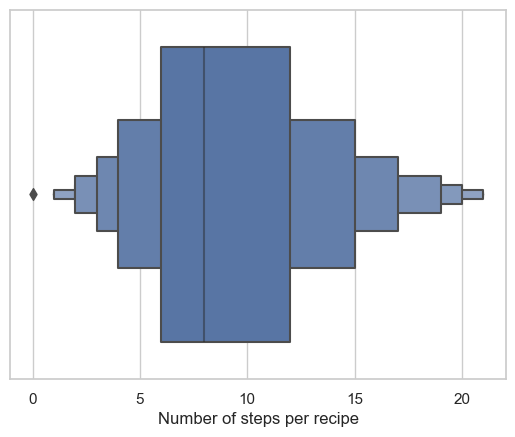

In [31]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [32]:
raw_recipes_df.head().sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11


#### Tiếp theo là đến số lượng nguyên liệu


In [33]:
Q1 = raw_recipes_df['n_ingredients'].quantile(0.25)
Q3 = raw_recipes_df['n_ingredients'].quantile(0.75)
IQR = Q3 - Q1

# Tính toán khoảng Tukey
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

#LLọc outliers
ningredients_outliers = raw_recipes_df[(raw_recipes_df['n_ingredients'] > max_value) | (raw_recipes_df['n_ingredients'] < min_value)]
ningredients_outliers.sort_values('n_ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
114219,jamie oliver s meatballs,430695,75,1609858,2010-06-22,"['time-to-make', 'course', 'main-ingredient', ...","[1353.4, 111.0, 41.0, 34.0, 137.0, 118.0, 34.0]",18,"['preheat oven to 425f', 'in a large bown , mi...","['ground beef', 'ground pork', 'bread', 'dried...",19
195840,spicy fig and artichoke salad,252878,30,39547,2007-09-13,"['30-minutes-or-less', 'time-to-make', 'course...","[323.9, 37.0, 67.0, 5.0, 9.0, 20.0, 9.0]",15,['prepare the ingredients: 1) thinly slice the...,"['olive oil', 'red onion', 'garlic cloves', 'm...",19
210324,thai wrap sandwich,336762,30,269521,2008-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[829.3, 89.0, 72.0, 46.0, 54.0, 70.0, 18.0]",19,"['sauce:', 'in small sauce pan melt butter', '...","['sandwich wraps', 'cooked chicken breasts', '...",19
59931,crab stuffed orange roughy,54320,55,29300,2003-02-17,"['60-minutes-or-less', 'time-to-make', 'course...","[259.7, 5.0, 8.0, 25.0, 67.0, 3.0, 5.0]",15,"['preheat oven to 350 degrees', 'spray and 8-x...","['butter-flavored cooking spray', 'seasoned dr...",19
103971,heart healthy beef conquistador,461267,50,635237,2011-08-01,"['60-minutes-or-less', 'time-to-make', 'course...","[516.3, 17.0, 27.0, 17.0, 41.0, 15.0, 28.0]",18,['complete all chopping and dicing in advance'...,"['potatoes', 'quinoa', 'onion', 'garlic cloves...",19
...,...,...,...,...,...,...,...,...,...,...,...
105723,hillbilly bean soup,11737,255,10404,2001-09-18,"['weeknight', 'time-to-make', 'course', 'main-...","[323.0, 2.0, 254.0, 1.0, 8.0, 1.0, 27.0]",6,"['boil the drained , soaked beans with the wat...","['7 bean mix', 'water', 'ham bone', 'bay leaf'...",35
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6,['heat vegetable oil to 350f submerge tortilla...,"['flour tortillas', 'ground beef', 'vegetable ...",37
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16,"['dice or shred meat and vegetables', 'heat oi...","['brown rice', 'green onions', 'oil', 'soy sau...",38
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9,"['spicy tomatoe & vegetable sauce', 'in a larg...","['sweet onion', 'garlic cloves', 'green pepper...",39


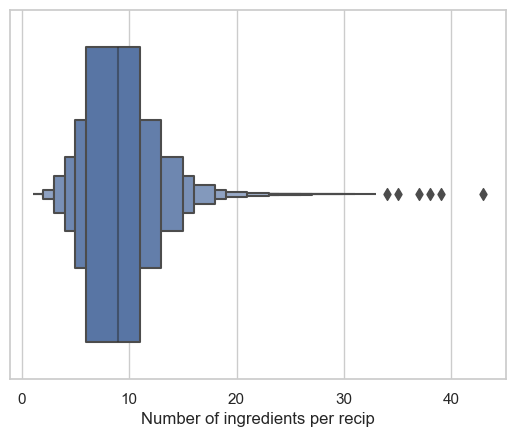

In [34]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_ingredients'])
ax.set_xlabel('Number of ingredients per recip')
plt.show()

#### Ở đây ta không gạt bỏ đi các outliers, vì có lẽ số lượng nguyên liệu như vậy không phải quá phi lý.

Index([5, 4, 0, 3, 2, 1], dtype='int64', name='rating')
[816364 187360  60847  40855  14123  12818]


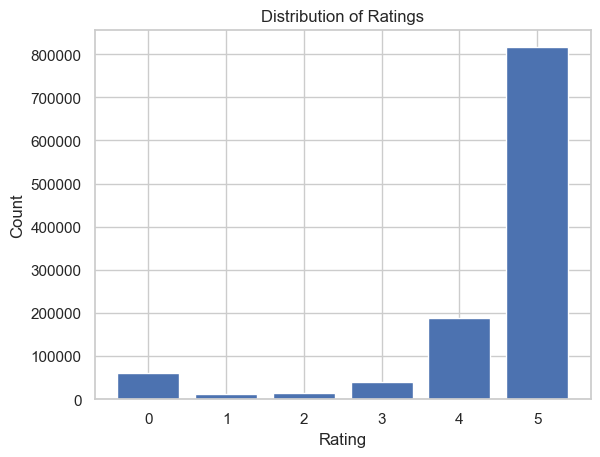

In [35]:
#Kiểm tra phân phối của raw_interactions_df['rating']
rating_counts = raw_interactions_df['rating'].value_counts()
ratings = rating_counts.index
counts = rating_counts.values
print(ratings)
print(counts)

plt.bar(ratings, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

#### Những rating ở đây chỉ được đánh số từ 1-5, không có rating 0. Ratin = 0 tức là có những trường hợp không đánh giá, vì vậy ta sẽ loại bỏ những trường hợp có rating =0

Index([5, 4, 3, 2, 1], dtype='int64', name='rating')
[816364 187360  40855  14123  12818]


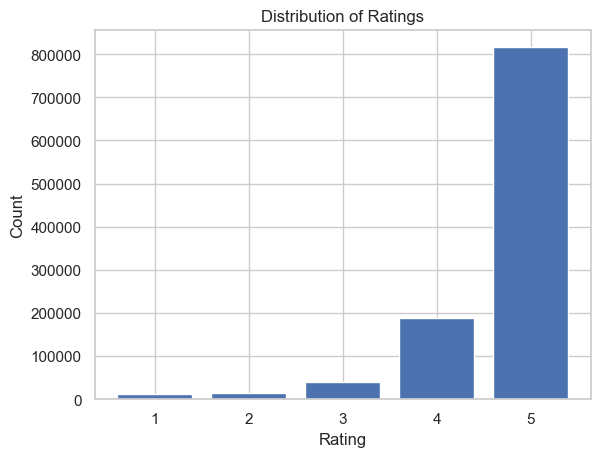

In [36]:
raw_interactions_df = raw_interactions_df[raw_interactions_df['rating'] != 0]

rating_counts = raw_interactions_df['rating'].value_counts()
ratings = rating_counts.index
counts = rating_counts.values
print(ratings)
print(counts)

plt.bar(ratings, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

#### Đã xử lý xong công đoạn làm sạch dữ liệu

# Data Preprocessing


In [37]:
raw_recipes_df.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...","['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


#### Thuận tiện cho việc training cũng như làm rõ bộ dữ liệu, ta sẽ tách các thông số từ feature 'nutrition' ra. Feature này hiện tại đang ở dạng list, theo tác giả của dataset các thông số lần lượt là ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']. 

In [39]:
nutrition_cols = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
for column in nutrition_cols:
    raw_recipes_df[column] = raw_recipes_df['nutrition'].apply(lambda x: eval(x)[nutrition_cols.index(column)])
    

In [40]:
raw_recipes_df.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...","['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,"['fennel seeds', 'green olives', 'ripe olives'...",9,380.7,53.0,7.0,24.0,6.0,24.0,6.0
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...","['chocolate sandwich style cookies', 'chocolat...",6,4270.8,254.0,1306.0,111.0,127.0,431.0,220.0
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...","['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,2669.3,160.0,976.0,107.0,62.0,310.0,138.0


In [41]:
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221617 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            221617 non-null  object        
 1   id              221617 non-null  object        
 2   minutes         221617 non-null  int64         
 3   contributor_id  221617 non-null  object        
 4   submitted       221617 non-null  datetime64[ns]
 5   tags            221617 non-null  object        
 6   nutrition       221617 non-null  object        
 7   n_steps         221617 non-null  int64         
 8   steps           221617 non-null  object        
 9   ingredients     221617 non-null  object        
 10  n_ingredients   221617 non-null  int64         
 11  calories        221617 non-null  float64       
 12  total_fat       221617 non-null  float64       
 13  sugar           221617 non-null  float64       
 14  sodium          221617 non-null  float64 

#### Xử lý tiếp tục với chuỗi thời gian 'submitted'

In [42]:
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

raw_recipes_df['submitted_month'] = raw_recipes_df['submitted'].dt.month.map(month_mapping)
raw_recipes_df['submitted_year'] = raw_recipes_df['submitted'].dt.year

# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_month,submitted_year
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Sep,2005
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Jun,2002
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Feb,2005
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Apr,2003
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Oct,2002


#### xử lý tương tự với raw_interactions

In [43]:
raw_interactions_df.columns

Index(['user_id', 'recipe_id', 'date', 'rating'], dtype='object')

In [44]:
raw_interactions_df['review_month'] = raw_interactions_df['date'].dt.month.map(month_mapping)
raw_interactions_df['review_year'] = raw_interactions_df['date'].dt.year

# Sanity check
raw_interactions_df.head()

,user_id,recipe_id,date,rating,review_month,review_year
0,38094,40893,2003-02-17,4,Feb,2003
1,1293707,40893,2011-12-21,5,Dec,2011
2,8937,44394,2002-12-01,4,Dec,2002
3,126440,85009,2010-02-27,5,Feb,2010
4,57222,85009,2011-10-01,5,Oct,2011


In [49]:
raw_recipes_df['dairy-free'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'dairy-free' in x else 0)
raw_recipes_df['gluten-free'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'gluten-free' in x else 0)
raw_recipes_df['low-carb'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'low-carb' in x else 0)
raw_recipes_df['vegan'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'vegan' in x else 0)
raw_recipes_df['vegetarian'] = raw_recipes_df['tags'].apply(lambda x: 1 if 'vegetarian' in x else 0)

In [50]:
raw_recipes_df.sample(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
33131,cabbage kielbasa and pierogies,301594,35,37722,2008-04-30,"['60-minutes-or-less', 'time-to-make', 'course...","[833.8, 111.0, 56.0, 70.0, 46.0, 167.0, 8.0]",15,"['bring a large pot of water to a boil', 'add ...","['frozen potato and onion pierogies', 'butter'...",...,46.0,167.0,8.0,Apr,2008,0,0,0,0,0
139106,moravian chicken pie,152965,180,210965,2006-01-23,"['time-to-make', 'course', 'preparation', 'sav...","[533.2, 49.0, 1.0, 40.0, 41.0, 44.0, 13.0]",20,"['for pie crust , combine flour and salt in a ...","['all-purpose flour', 'salt', 'shortening', 'c...",...,41.0,44.0,13.0,Jan,2006,0,0,0,0,0
58981,country apple squares,100988,50,87236,2004-09-30,"['60-minutes-or-less', 'time-to-make', 'course...","[308.6, 26.0, 85.0, 4.0, 8.0, 37.0, 12.0]",9,"['combine flour , brown sugar and cinnamon', '...","['all-purpose flour', 'brown sugar', 'cinnamon...",...,8.0,37.0,12.0,Sep,2004,0,0,0,0,0
146722,okra patties,17778,30,6258,2002-01-22,"['30-minutes-or-less', 'time-to-make', 'course...","[174.1, 3.0, 9.0, 29.0, 13.0, 2.0, 11.0]",3,"['combine okra , onion , salt , pepper , water...","['okra', 'onion', 'salt', 'pepper', 'water', '...",...,13.0,2.0,11.0,Jan,2002,0,0,0,0,0
111500,inside out turkey stuffed bell pepper casserole,79470,93,52528,2003-12-23,"['time-to-make', 'course', 'main-ingredient', ...","[353.1, 18.0, 30.0, 36.0, 60.0, 19.0, 10.0]",5,"['preheat oven to 350 degrees', 'brown the gro...","['ground turkey', 'onion', 'stewed tomatoes', ...",...,60.0,19.0,10.0,Dec,2003,0,0,0,0,0


In [52]:
#Kiem tra cac cot moi them vao
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221617 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   name             221617 non-null  object        
 1   id               221617 non-null  object        
 2   minutes          221617 non-null  int64         
 3   contributor_id   221617 non-null  object        
 4   submitted        221617 non-null  datetime64[ns]
 5   tags             221617 non-null  object        
 6   nutrition        221617 non-null  object        
 7   n_steps          221617 non-null  int64         
 8   steps            221617 non-null  object        
 9   ingredients      221617 non-null  object        
 10  n_ingredients    221617 non-null  int64         
 11  calories         221617 non-null  float64       
 12  total_fat        221617 non-null  float64       
 13  sugar            221617 non-null  float64       
 14  sodium           221617 n

In [53]:
#Aggregation
raw_interactions_df.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review_month',
       'review_year'],
      dtype='object')

In [55]:
user_rating = raw_interactions_df[['recipe_id', 'rating']].copy()
user_rating

,recipe_id,rating
0,40893,4
1,40893,5
2,44394,4
3,85009,5
4,85009,5
...,...,...
1132360,82303,5
1132363,386618,5
1132364,78003,5
1132365,78003,4


In [56]:
user_rating = user_rating.groupby(['recipe_id'])['rating'].agg(['mean', 'count'])
user_rating.reset_index(inplace = True)

user_rating.head()

,recipe_id,mean,count
0,100,3.000000,2
1,10000,3.000000,1
2,100000,4.708333,24
3,100001,4.666667,3
4,100002,4.000000,1


In [57]:
user_rating.rename(columns = {'mean': 'average_rating', 'count': 'votes'}, inplace = True)
user_rating

,recipe_id,average_rating,votes
0,100,3.000000,2
1,10000,3.000000,1
2,100000,4.708333,24
3,100001,4.666667,3
4,100002,4.000000,1
...,...,...,...
226585,99995,4.545455,11
226586,99996,5.000000,11
226587,99997,4.000000,1
226588,99998,5.000000,2


In [59]:
# Rename columns 
user_rating.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)

# View table
user_rating

,recipe_id,average_rating,votes
0,100,3.000000,2
1,10000,3.000000,1
2,100000,4.708333,24
3,100001,4.666667,3
4,100002,4.000000,1
...,...,...,...
226585,99995,4.545455,11
226586,99996,5.000000,11
226587,99997,4.000000,1
226588,99998,5.000000,2


In [60]:
food_df = pd.merge(raw_recipes_df, user_rating, left_on = 'id', right_on = 'recipe_id')
food_df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian,recipe_id,average_rating,votes
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",...,Sep,2005,0,0,0,0,1,137739,5.000000,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",...,Jun,2002,0,0,0,0,0,31490,4.666667,3
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",...,Feb,2005,0,0,0,0,0,112140,4.000000,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",...,Apr,2003,0,0,0,0,0,59389,4.500000,2
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,Oct,2002,0,0,0,0,1,44061,5.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216947,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...","['celery', 'onion', 'green sweet pepper', 'gar...",...,Aug,2012,0,0,0,0,0,486161,5.000000,6
216948,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],"['paprika', 'salt', 'garlic powder', 'onion po...",...,Jan,2013,0,0,0,1,1,493372,5.000000,1
216949,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","['hard-cooked eggs', 'mayonnaise', 'dijon must...",...,Jun,2008,0,0,0,0,0,308080,5.000000,5
216950,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"['butter', 'eagle brand condensed milk', 'ligh...",...,Apr,2008,0,0,0,0,0,298512,1.000000,1


In [61]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216952 entries, 0 to 216951
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   name             216952 non-null  object        
 1   id               216952 non-null  object        
 2   minutes          216952 non-null  int64         
 3   contributor_id   216952 non-null  object        
 4   submitted        216952 non-null  datetime64[ns]
 5   tags             216952 non-null  object        
 6   nutrition        216952 non-null  object        
 7   n_steps          216952 non-null  int64         
 8   steps            216952 non-null  object        
 9   ingredients      216952 non-null  object        
 10  n_ingredients    216952 non-null  int64         
 11  calories         216952 non-null  float64       
 12  total_fat        216952 non-null  float64       
 13  sugar            216952 non-null  float64       
 14  sodium           216

In [62]:
#Save data
raw_interactions_df.to_pickle('interactions.pkl')
raw_recipes_df.to_pickle('recipes.pkl')
food_df.to_pickle('food.pkl')